Instalando a Biblioteca de Alicações Fuzzy em Python

In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=9af6eae0d7ab9e7125d358e5e9159ef5d7a965ee9a8e4dc88c403321ab5e466d
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
import matplotlib.pyplot as plt

Declaração das Entradas do Sistema de Inferência Térmico

In [ ]:
erro = ctrl.Antecedent(np.arange(-120,140,10),'erro')
var_erro = ctrl.Antecedent(np.arange(-30,32,1),'var_erro')
resistencia_aquecimento = ctrl.Consequent(np.arange(0,12,1),'resistencia_aquecimento')

Pertinências do Erro de Temperatura e da Variação do Erro de Temperatura


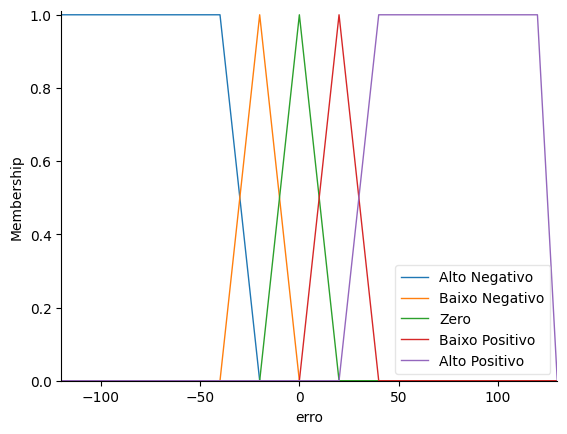

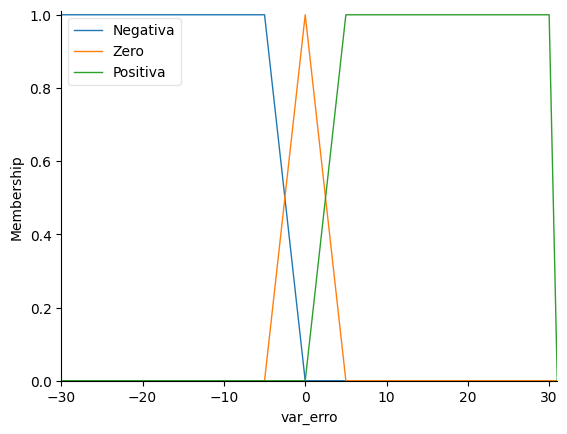

In [ ]:
erro["Alto Negativo"] = fuzz.trapmf(erro.universe,[-120,-120,-40,-20])
erro["Baixo Negativo"] = fuzz.trimf(erro.universe,[-40,-20,0])
erro["Zero"] = fuzz.trimf(erro.universe,[-20,0,20])
erro["Baixo Positivo"] = fuzz.trimf(erro.universe,[0,20,40])
erro["Alto Positivo"] = fuzz.trapmf(erro.universe,[20,40,120,120])

var_erro["Negativa"] = fuzz.trapmf(var_erro.universe,[-30,-30,-5,-0])
var_erro["Zero"] = fuzz.trimf(var_erro.universe,[-5,0,5])
var_erro["Positiva"] = fuzz.trapmf(var_erro.universe,[0,5,30,30])
erro.view()
var_erro.view()

Pertinências da intensidade da Resistência de aquecimento


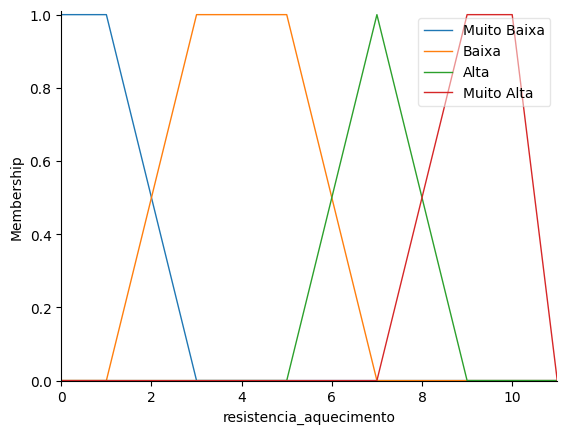

In [ ]:
resistencia_aquecimento["Muito Baixa"] = fuzz.trapmf(resistencia_aquecimento.universe,[0,0,1,3])
resistencia_aquecimento["Baixa"] = fuzz.trapmf(resistencia_aquecimento.universe,[1,3,5,7])
resistencia_aquecimento["Alta"] = fuzz.trimf(resistencia_aquecimento.universe,[5,7,9])
resistencia_aquecimento["Muito Alta"] = fuzz.trapmf(resistencia_aquecimento.universe,[7,9,10,10])
resistencia_aquecimento.view()

Base de Regras do Sistema de Inferência

In [ ]:
rule1 = ctrl.Rule(erro['Alto Negativo'] & var_erro['Negativa'], resistencia_aquecimento['Muito Baixa'])
rule2 = ctrl.Rule(erro['Baixo Negativo'] & var_erro['Negativa'], resistencia_aquecimento['Muito Baixa'])
rule3 = ctrl.Rule(erro['Zero'] & var_erro['Negativa'], resistencia_aquecimento['Muito Baixa'])
rule4 = ctrl.Rule(erro['Baixo Positivo'] & var_erro['Negativa'], resistencia_aquecimento['Alta'])
rule5 = ctrl.Rule(erro['Alto Positivo'] & var_erro['Negativa'], resistencia_aquecimento['Muito Alta'])

rule6 = ctrl.Rule(erro['Alto Negativo'] & var_erro['Zero'], resistencia_aquecimento['Muito Baixa'])
rule7 = ctrl.Rule(erro['Baixo Negativo'] & var_erro['Zero'], resistencia_aquecimento['Baixa'])
rule8 = ctrl.Rule(erro['Zero'] & var_erro['Zero'], resistencia_aquecimento['Muito Baixa'])
rule9 = ctrl.Rule(erro['Baixo Positivo'] & var_erro['Zero'], resistencia_aquecimento['Alta'])
rule10 = ctrl.Rule(erro['Alto Positivo'] & var_erro['Zero'], resistencia_aquecimento['Muito Alta'])

rule11 = ctrl.Rule(erro['Alto Negativo'] & var_erro['Positiva'], resistencia_aquecimento['Muito Baixa'])
rule12 = ctrl.Rule(erro['Baixo Negativo'] & var_erro['Positiva'], resistencia_aquecimento['Baixa'])
rule13 = ctrl.Rule(erro['Zero'] & var_erro['Positiva'], resistencia_aquecimento['Muito Baixa'])
rule14 = ctrl.Rule(erro['Baixo Positivo'] & var_erro['Positiva'], resistencia_aquecimento['Alta'])
rule15 = ctrl.Rule(erro['Alto Positivo'] & var_erro['Positiva'], resistencia_aquecimento['Muito Alta'])

Agregação das Saídas Individuais de cada Regra Fuzzy

In [ ]:
aquecimento_re = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
aquecimento = ctrl.ControlSystemSimulation(aquecimento_re)

Testes com Interação do Usuário


Erro: -0.06203842, Var_Erro: 0.006381990000000004, Resistencia: 1.109593921974199
Erro: 0.04640961, Var_Erro: 0.10844803, Resistencia: 1.117321866290225
Erro: -0.03014374, Var_Erro: -0.07655334999999999, Resistencia: 1.1002779503174895
Erro: 0.1165848, Var_Erro: 0.14672854, Resistencia: 1.160968335284877
Erro: 0.06554794, Var_Erro: -0.05103686, Resistencia: 1.124975637733744
Erro: 0.122963, Var_Erro: 0.057415060000000004, Resistencia: 1.158730601782464
Erro: 0.122963, Var_Erro: 0.0, Resistencia: 1.1569824680816199
Erro: 0.1484833, Var_Erro: 0.02552030000000001, Resistencia: 1.1720467776971186
Erro: 0.237793, Var_Erro: 0.08930969999999999, Resistencia: 1.2263319846912526
Erro: 0.1293449, Var_Erro: -0.10844809999999999, Resistencia: 1.165807776598928
Erro: 0.3334846, Var_Erro: 0.2041397, Resistencia: 1.2885289354897962
Erro: 0.3398666, Var_Erro: 0.006381999999999999, Resistencia: 1.282684179631284
Erro: 15.20589, Var_Erro: 14.8660234, Resistencia: 5.540831313282917
Erro: 15.22504, Var_Er

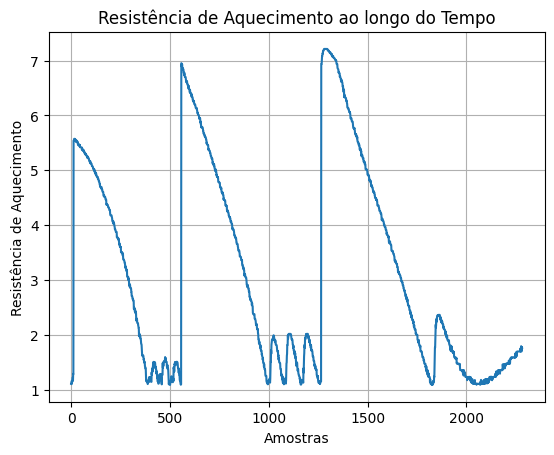

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

df = pd.read_excel('/content/drive/MyDrive/Subida-50-70-90.xlsx')  # Substitua 'dados.csv' pelo caminho do seu arquivo CSV

erro_dados = df['Erro_Temperatura'].values

# Loop para processar os dados e calcular variação do erro
resultados = [None]
for k in range(1, len(erro_dados)):
    erro_atual = erro_dados[k]
    erro_anterior = erro_dados[k - 1]
    var_erro_atual = erro_atual - erro_anterior

    aquecimento.input['erro'] = erro_atual
    aquecimento.input['var_erro'] = var_erro_atual
    aquecimento.compute()
    resultado = aquecimento.output['resistencia_aquecimento']
    resultados.append(resultado)
    print(f"Erro: {erro_atual}, Var_Erro: {var_erro_atual}, Resistencia: {resultado}")

# Crie um DataFrame com os resultados
resultados_df = pd.DataFrame({
    'Erro': erro_dados,
    'Resistencia_Aquecimento': resultados
})

# Opcional: Salvar o DataFrame em um arquivo Excel
resultados_df.to_excel('/content/resultados.xlsx', index=False)

# Plotar o valor da resistência de aquecimento
plt.plot(resultados)
plt.xlabel('Amostras')
plt.ylabel('Resistência de Aquecimento')
plt.title('Resistência de Aquecimento ao longo do Tempo')
plt.grid(True)
plt.show()
# Opcional: Baixar o arquivo Excel
files.download('/content/resultados.xlsx')

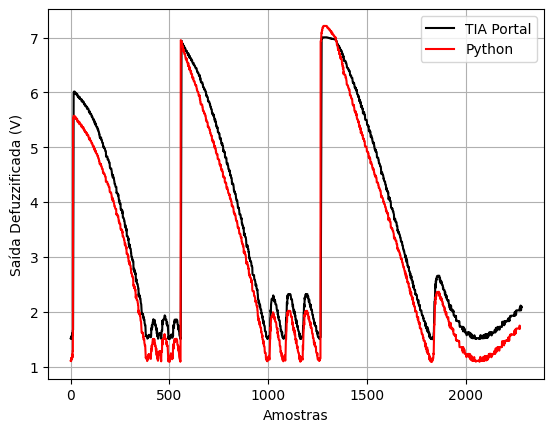

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
dados = pd.read_excel("/content/drive/MyDrive/Subida-50-70-90.xlsx")
dados1 = pd.read_excel("/content/drive/MyDrive/Py Subida 50 70 90.xlsx")


# Converter as colunas para valores numéricos, forçando a conversão e tratando qualquer valor não numérico como NaN
dados['Defuzzificada'] = pd.to_numeric(dados['Defuzzificada'], errors='coerce')
dados1['Resistencia_Aquecimento'] = pd.to_numeric(dados1['Resistencia_Aquecimento'], errors='coerce')

# Remover quaisquer linhas com NaN resultantes da conversão
dados = dados.dropna(subset=['Defuzzificada'])
dados1 = dados1.dropna(subset=['Resistencia_Aquecimento'])

# Garantir que os dados tenham o mesmo comprimento após a remoção de NaN
min_len = min(len(dados), len(dados1))
dados = dados[:min_len]
dados1 = dados1[:min_len]


plt.plot(dados["Defuzzificada"], label='TIA Portal', color='black')
plt.plot(dados1["Resistencia_Aquecimento"],label='Python', color='red')
plt.legend()
plt.xlabel('Amostras')
plt.ylabel('Saída Defuzzificada (V)')
#plt.title('Intensidade da Resistência de Aquecimento')
plt.grid(True)

# Salvando o gráfico em formato EPS com bordas ajustadas
plt.savefig('/content/drive/MyDrive/Intensidade_Resist_Aquec_Sub.eps', format='eps', bbox_inches='tight')

# Exibir o gráfico
plt.show()

# Se você estiver usando Google Colab e quiser baixar o arquivo
from google.colab import files
files.download('/content/drive/MyDrive/Intensidade_Resist_Aquec_Sub.eps')

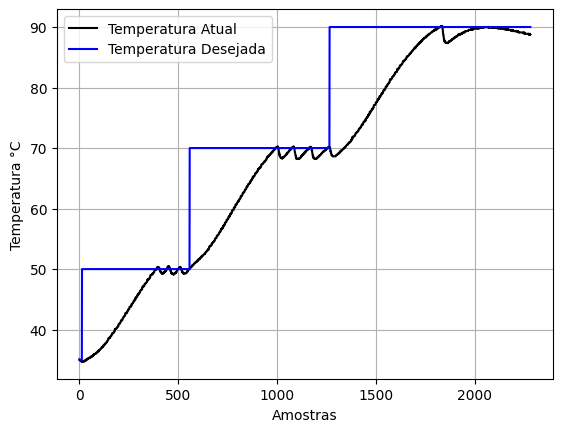

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
tab = pd.read_excel("/content/drive/MyDrive/Subida-50-70-90.xlsx")

import matplotlib.pyplot as plt

# Plotando as curvas de temperatura atual e desejada
plt.plot(tab['Temperatura_Atual'], label='Temperatura Atual', color='black')
plt.plot(tab['Temperatura_Desejada'], label='Temperatura Desejada', color='blue')

# Adicionando legendas ao gráfico
plt.legend()

# Adicionando rótulos aos eixos x e y
plt.xlabel('Amostras')
plt.ylabel('Temperatura °C')
#plt.title('Dados do experimento de Aquecimento')

# Exibindo o gráfico
plt.grid(True)
#plt.show()

# Salvando o gráfico em formato EPS com bordas ajustadas
plt.savefig('/content/drive/MyDrive/grafico_temperatura.eps', format='eps', bbox_inches='tight')

# Exibir o gráfico
plt.show()

# Se você estiver usando Google Colab e quiser baixar o arquivo
from google.colab import files
files.download('/content/drive/MyDrive/grafico_temperatura.eps')

In [ ]:
from google.colab import files
import numpy as np
import pandas as pd

# Carregar os dados do TIA Portal e do Python
# Substitua 'path_to_tia_portal_data.csv' e 'path_to_python_data.csv' pelos caminhos dos seus arquivos CSV
tia_df = pd.read_excel('/content/drive/MyDrive/Subida-50-70-90 - TIA.xlsx')
python_df = pd.read_excel('/content/drive/MyDrive/Py Subida 50 70 90 - Metrics.xlsx')

# Suponha que a coluna com as saídas no TIA Portal seja 'Resistencia_Aquecimento_TIA'
# E a coluna com as saídas no Python seja 'Resistencia_Aquecimento'

# Converter as colunas para valores numéricos, forçando a conversão e tratando qualquer valor não numérico como NaN
tia_df['Defuzzificada'] = pd.to_numeric(tia_df['Defuzzificada'], errors='coerce')
python_df['Resistencia_Aquecimento'] = pd.to_numeric(python_df['Resistencia_Aquecimento'], errors='coerce')

# Remover quaisquer linhas com NaN resultantes da conversão
tia_df = tia_df.dropna(subset=['Defuzzificada'])
python_df = python_df.dropna(subset=['Resistencia_Aquecimento'])

# Garantir que os dados tenham o mesmo comprimento após a remoção de NaN
min_len = min(len(tia_df), len(python_df))
tia_df = tia_df[:min_len]
python_df = python_df[:min_len]

# Renomear as colunas para consistência
tia_df.columns = ['Defuzzificada']
# Renomear a única coluna para consistência
python_df.columns = ['Resistencia_Aquecimento']

# Garantir que os dados tenham o mesmo comprimento
min_len = min(len(tia_df), len(python_df))
tia_df = tia_df[:min_len]
python_df = python_df[:min_len]

# Converter para arrays numpy
saida_tia = tia_df['Defuzzificada'].values
saida_python = python_df['Resistencia_Aquecimento'].values

# Calcular RMSE (Root Mean Square Error)
rmse = np.sqrt(np.mean((saida_tia - saida_python) ** 2))

# Calcular MAE (Mean Absolute Error)
mae = np.mean(np.abs(saida_tia - saida_python))

# Calcular NDEI (Normalized Mean Square Error)
# NDEI = RMSE / std(saida_tia)
ndei = rmse / np.std(saida_tia)

print(f"RMSE: {round(rmse,4)}")
print(f"MAE: {round(mae,4)}")
print(f"NDEI: {round(ndei,4)}")




RMSE: 0.4527
MAE: 0.3448
NDEI: 0.244


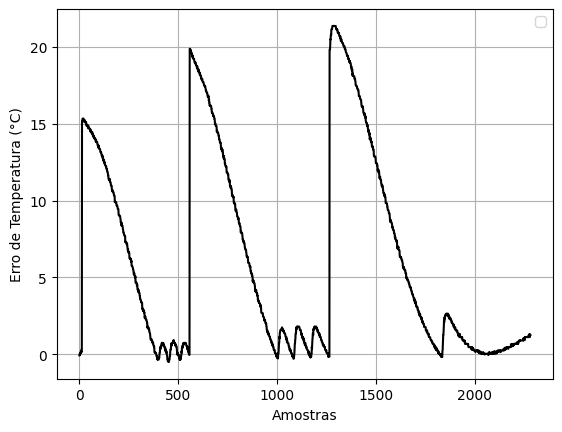

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
ams = pd.read_excel("/content/drive/MyDrive/Subida-50-70-90.xlsx")

import matplotlib.pyplot as plt


# Converter as colunas para valores numéricos, forçando a conversão e tratando qualquer valor não numérico como NaN
ams['Erro_Temperatura'] = pd.to_numeric(ams['Erro_Temperatura'], errors='coerce')

# Remover quaisquer linhas com NaN resultantes da conversão
ams = ams.dropna(subset=['Erro_Temperatura'])

# Plotando as curvas de temperatura atual e desejada
plt.plot(ams['Erro_Temperatura'], color='black')

import matplotlib.pyplot as plt

# Adicionando legendas ao gráfico
plt.legend()

# Adicionando rótulos aos eixos x e y
plt.xlabel('Amostras')
plt.ylabel('Erro de Temperatura (°C)')
#plt.title('Dados de Subida de Temperatura')

# Exibindo o gráfico
plt.grid(True)
#plt.show()

# Salvando o gráfico em formato EPS com bordas ajustadas
plt.savefig('/content/drive/MyDrive/grafico_erro.eps', format='eps', bbox_inches='tight')

# Exibir o gráfico
plt.show()

# Se você estiver usando Google Colab e quiser baixar o arquivo
from google.colab import files
files.download('/content/drive/MyDrive/grafico_erro.eps')

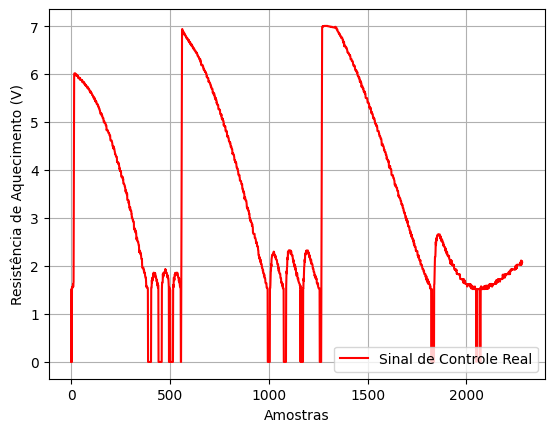

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
dados = pd.read_excel("/content/drive/MyDrive/Subida-50-70-90.xlsx")
dados1 = pd.read_excel("/content/drive/MyDrive/Py Subida 50 70 90.xlsx")


# Converter as colunas para valores numéricos, forçando a conversão e tratando qualquer valor não numérico como NaN
dados['Resistencia'] = pd.to_numeric(dados['Resistencia'], errors='coerce')
dados1['Resistencia_Aquecimento'] = pd.to_numeric(dados1['Resistencia_Aquecimento'], errors='coerce')

# Remover quaisquer linhas com NaN resultantes da conversão
dados = dados.dropna(subset=['Resistencia'])
dados1 = dados1.dropna(subset=['Resistencia_Aquecimento'])

# Garantir que os dados tenham o mesmo comprimento após a remoção de NaN
min_len = min(len(dados), len(dados1))
dados = dados[:min_len]
dados1 = dados1[:min_len]


plt.plot(dados["Resistencia"], label='Sinal de Controle Real', color='red')
#plt.plot(dados1["Resistencia_Aquecimento"],label='Saída Python', color='red')
plt.legend()
plt.xlabel('Amostras')
plt.ylabel('Resistência de Aquecimento (V)')
#plt.title('Intensidade da Resistência de Aquecimento')
plt.grid(True)

# Salvando o gráfico em formato EPS com bordas ajustadas
plt.savefig('/content/drive/MyDrive/Intensidade_Resist_Aquec_Sub_Real.eps', format='eps', bbox_inches='tight')

# Exibir o gráfico
plt.show()

# Se você estiver usando Google Colab e quiser baixar o arquivo
from google.colab import files
files.download('/content/drive/MyDrive/Intensidade_Resist_Aquec_Sub_Real.eps')